# DETEKSI TEPI


## IMPORT LIBRARY

In [3]:
#202331103_Nazif Alfathir Siregar
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#202331103_Nazif Alfathir Siregar
image = cv2.imread('parkiran.jpg')
image.shape

(799, 1200, 3)

Text(0.5, 1.0, 'GRAY')

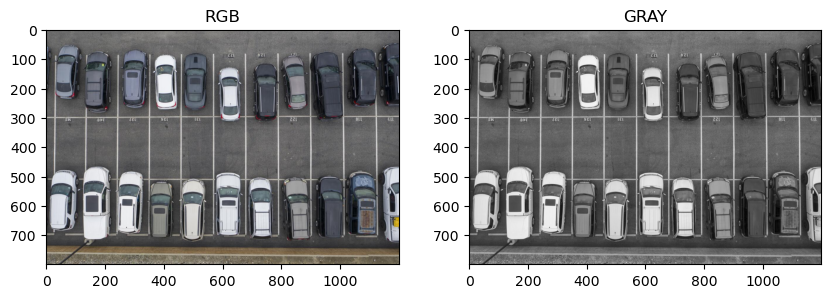

In [5]:
#202331103_Nazif Alfathir Siregar
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("RGB")

ax[1].imshow(img_gray, cmap ='gray')
ax[1].set_title("GRAY")

### MENDETEKSI AMBANG BATAS DARI TEPI

In [9]:
#202331103_Nazif Alfathir Siregar
edges = cv2.Canny(image, 100,150)

Text(0.5, 1.0, 'EDGES')

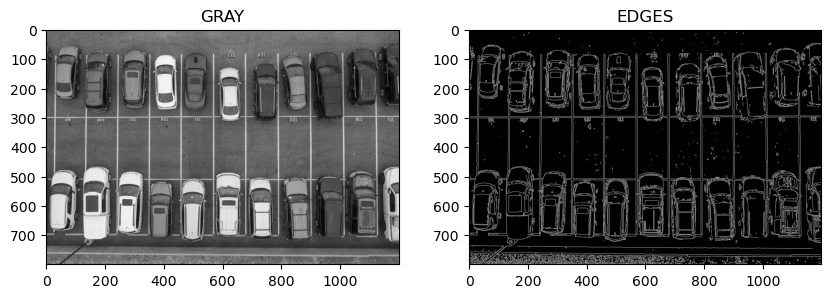

In [12]:
#202331103_Nazif Alfathir Siregar
fig, axs = plt.subplots(1,2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img_gray, cmap ='gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges, cmap ='gray')
ax[1].set_title("EDGES")

In [13]:
#202331103_Nazif Alfathir Siregar
lines = cv2.HoughLinesP(edges,1,np.pi/180,90, maxLineGap=150)
img_line = image.copy()

In [16]:
#202331103_Nazif Alfathir Siregar
for line in lines :
    x1,y1,x2,y2 = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (100,80,225),1)

Text(0.5, 1.0, 'EDGES')

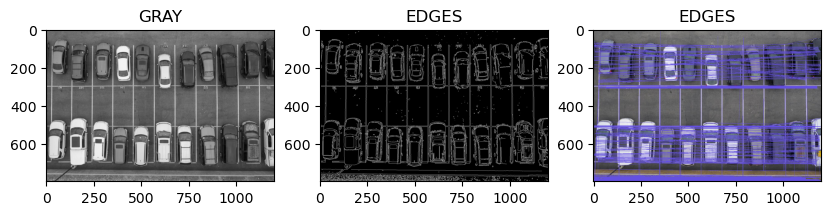

In [50]:
#202331103_Nazif Alfathir Siregar
fig, axs = plt.subplots(1,3, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(img_gray, cmap ='gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges, cmap ='gray')
ax[1].set_title("EDGES")

ax[2].imshow(img_line, cmap ='gray')
ax[2].set_title("EDGES")

## OPERASI GEOMETRIK

### baca gambar

In [54]:
#202331103_Nazif Alfathir Siregar
img_car = cv2.imread('mobil.png')
row,  cols, _= img_car.shape
print ('img shape: ', img_car.shape)

img shape:  (1080, 1920, 3)


## cara 1

Text(0.5, 1.0, 'resize img')

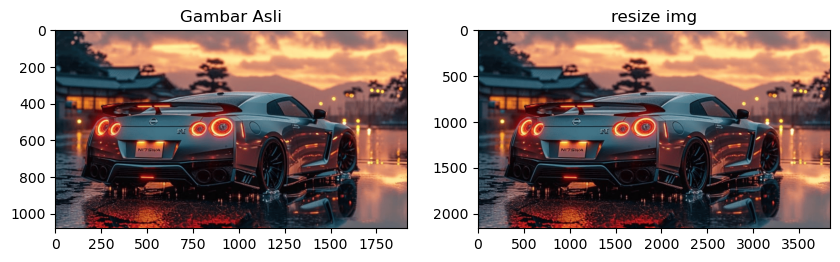

In [67]:
#202331103_Nazif Alfathir Siregar
res = cv2.resize(img_car, None, fx=2, fy=2,
                interpolation=cv2.INTER_CUBIC)
img_rgb = cv2.cvtColor(img_car, cv2.COLOR_BGR2RGB)
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_rgb)
ax[0].set_title("Gambar Asli")

ax[1].imshow(res_rgb)
ax[1].set_title("resize img")

## cara 2

Text(0.5, 1.0, 'resize img')

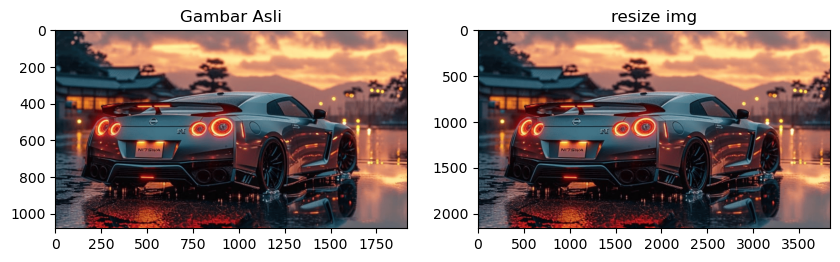

In [69]:
#202331103_Nazif Alfathir Siregar
tinggi, lebar = img_car.shape[:2]
res2 = cv2.resize(img_car, (4*lebar, 4*tinggi), 
                  interpolation=cv2.INTER_CUBIC)
img_rgb = cv2.cvtColor(img_car, cv2.COLOR_BGR2RGB)
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_rgb)
ax[0].set_title("Gambar Asli")

ax[1].imshow(res_rgb)
ax[1].set_title("resize img")

## Perputaran Citra / Rotasi Gambar

In [30]:
#202331103_Nazif Alfathir Siregar
img_car = cv2.imread('mobil.png',0)
row,  cols = img_car.shape
print ('img shape: ', img_car.shape)

img shape:  (1080, 1920)


## cara 1

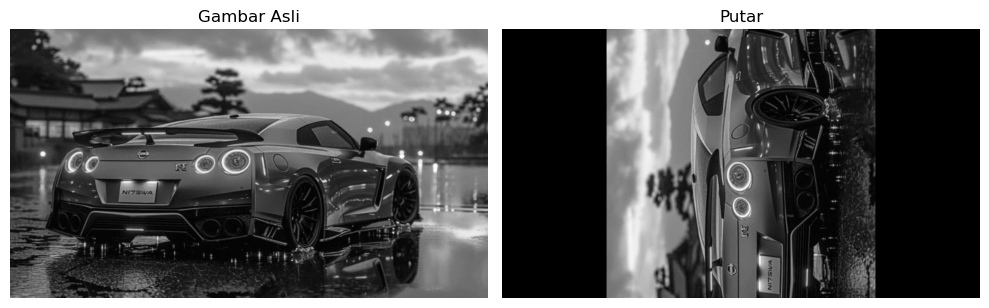

In [32]:
#202331103_Nazif Alfathir Siregar
M = cv2.getRotationMatrix2D(((cols-1)/2.0, (row-1)/2.0),90,1)

img_putar = cv2.warpAffine(img_car, M, (cols, row))

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_car, cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(img_putar, cmap='gray')
ax[1].set_title("Putar")

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()

## Cara 2

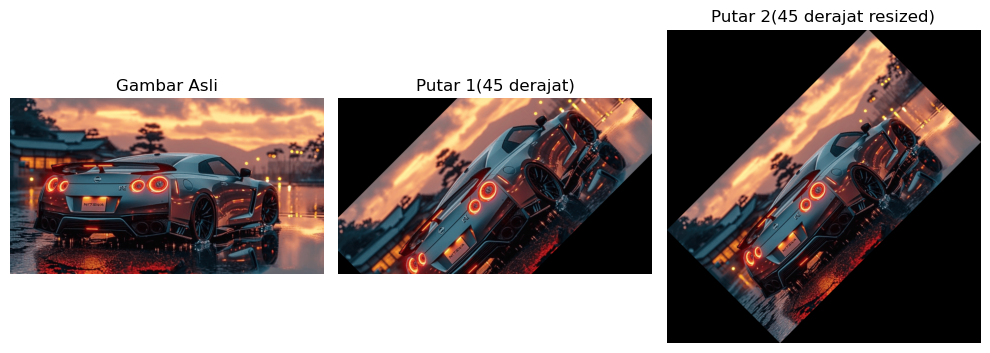

In [36]:
#202331103_Nazif Alfathir Siregar
from skimage import io, transform;

img_car2 = io.imread('mobil.png')

rotated = transform.rotate(img_car2, 45, resize=False)
rotated2 = transform.rotate(img_car2, 45, resize=True)

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_car2, cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(rotated, cmap='gray')
ax[1].set_title("Putar 1(45 derajat)")

ax[2].imshow(rotated2, cmap='gray')
ax[2].set_title("Putar 2(45 derajat resized)")

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()

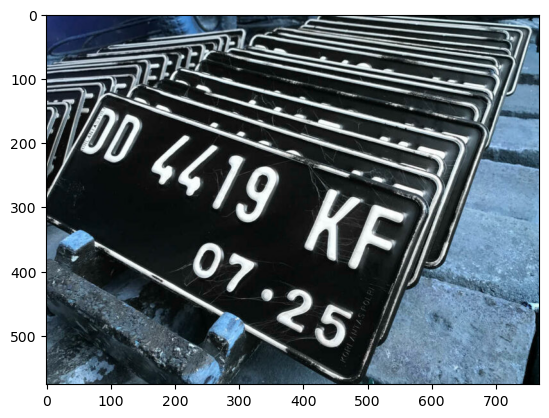

In [37]:
#202331103_Nazif Alfathir Siregar
t = cv2.imread('plat.jpg')
plt.imshow(t)

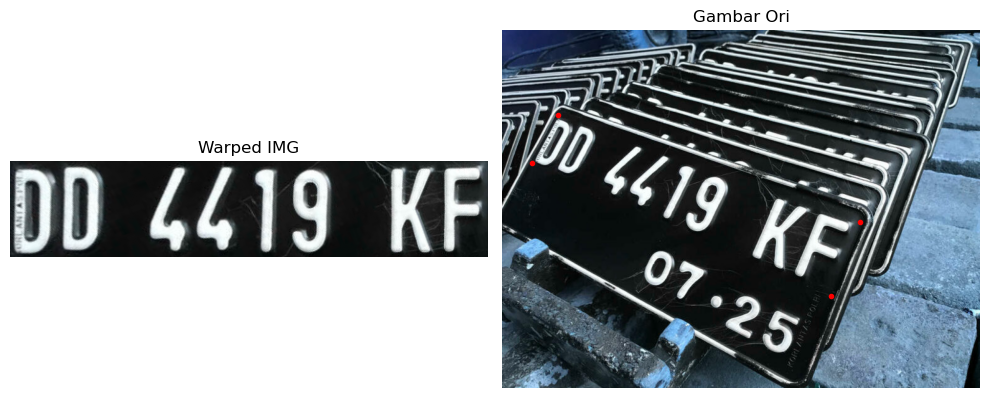

In [39]:
#202331103_Nazif Alfathir Siregar
src = np.array([
    [0,0],
    [0,100],
    [500,100],
    [500,0]
])

crp = np.array([
    [88,136],
    [47,214],
    [528,427],
    [574,309]
])

tform = transform.ProjectiveTransform()
tform.estimate(src, crp)

warped = transform.warp(t, tform, output_shape=(100,500))

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(warped)
ax[0].set_title("Warped IMG")

ax[1].imshow(t)
ax[1].plot(crp[:,0], crp[:,1], '.r')
ax[1].set_title("Gambar Ori")

for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()